In [ ]:
import pandas as pd
data = pd.read_excel('yandex_gdf_prefinal_2 ультра модный.xlsx')

## Competitevness and entropy

In [ ]:
comp_list_cuisine = ['Европейская',
 'Американская',
 'Азиатская',
 'Итальянская',
 'Международная',
 'СССР',
 'Латино-американская',
 'Восточная',
 'Грузинская',
 'Здоровая',
 'Кавказская',
 'Африканская',
 'Австралийская',
 'Канадская',
 'Новозеландская',
 'Китайская',
 'Шавермочная',
 'Кальяночная']
comp_list_type = ['Гриль и шашлык',
 'Ресторан',
 'Фастфуд',
 'Кафе',
 'Бар, паб, пиво, вино',
 'Кофе и чай',
 'Пицца',
 'Суши',
 'Пекарня',
 'Десерты',
 'Столовая',
 'Другое',
 'Бургеры',
 'Магазин']

In [ ]:
yandex_gdf_prefinal_2 = data

In [ ]:
import statistics
yandex_gdf_prefinal_2['competitiveness_cuisine'] = 0
yandex_gdf_prefinal_2['competitiveness_type'] = 0

#competit_neigh_count_

for i in range(0, len(yandex_gdf_prefinal_2)):
  for j in comp_list_cuisine:
    comp_column = 'competit_neigh_count_' + j
    if yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc(j)] == 1:
      already_in_cell = float(yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_cuisine')])
      number = float(yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc(comp_column)])
      if number > 1:
        number = 1.
      if already_in_cell != 0:
        yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_cuisine')] = statistics.mean([already_in_cell, number])
      else:
        yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_cuisine')] = number

In [ ]:
for i in range(0, len(yandex_gdf_prefinal_2)):
  for j in comp_list_type:
    comp_column = 'competit_neigh_count_' + j
    if yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc(j)] == 1:
      already_in_cell = float(yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_type')])
      number = float(yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc(comp_column)])
      if already_in_cell == 0:
        yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_type')] = statistics.mean([already_in_cell, number])
      else:
        yandex_gdf_prefinal_2.iloc[i, yandex_gdf_prefinal_2.columns.get_loc('competitiveness_type')] = number

In [ ]:
data = yandex_gdf_prefinal_2

In [ ]:
comp_list_cuisine = ['competit_neigh_count_Европейская',
 'competit_neigh_count_Американская',
 'competit_neigh_count_Азиатская',
 'competit_neigh_count_Итальянская',
 'competit_neigh_count_Международная',
 'competit_neigh_count_СССР',
 'competit_neigh_count_Латино-американская',
 'competit_neigh_count_Восточная',
 'competit_neigh_count_Грузинская',
 'competit_neigh_count_Здоровая',
 'competit_neigh_count_Кавказская',
 'competit_neigh_count_Африканская',
 'competit_neigh_count_Австралийская',
 'competit_neigh_count_Канадская',
 'competit_neigh_count_Новозеландская',
 'competit_neigh_count_Китайская',
 'competit_neigh_count_Шавермочная',
 'competit_neigh_count_Кальяночная']
comp_list_type = ['competit_neigh_count_Гриль и шашлык',
 'competit_neigh_count_Ресторан',
 'competit_neigh_count_Фастфуд',
 'competit_neigh_count_Кафе',
 'competit_neigh_count_Бар, паб, пиво, вино',
 'competit_neigh_count_Кофе и чай',
 'competit_neigh_count_Пицца',
 'competit_neigh_count_Суши',
 'competit_neigh_count_Пекарня',
 'competit_neigh_count_Десерты',
 'competit_neigh_count_Столовая',
 'competit_neigh_count_Другое',
 'competit_neigh_count_Бургеры',
 'competit_neigh_count_Магазин']

In [ ]:
import math

data['entropy_cuisine'] = 0
data['entropy_type'] = 0

for i in range(0, len(data)):
  entr = 0
  for j in comp_list_cuisine:
    number = int(data.iloc[i, data.columns.get_loc(j)])
    if number != 0:
      entr += (number * math.log(number))
  data.iloc[i, data.columns.get_loc('entropy_cuisine')] = entr


for i in range(0, len(data)):
  entr = 0
  for j in comp_list_type:
    number = int(data.iloc[i, data.columns.get_loc(j)])
    if number != 0:
      entr += (number * math.log(number))
  data.iloc[i, data.columns.get_loc('entropy_type')] = entr

##Processing of geo dataset

In [ ]:
data = data.rename(columns = {
 'Общая площадь земель муниципального образования, гектар' : 'square_land',
 'Общая протяженность улиц, проездов, набережных (на конец года), километр': 'street_length',
 'Общая площадь жилых помещений, тысяча метров квадратных': 'square_living',
 'Оценка численности населения на 1 января текущего года, человек.1': 'population',
 'Женщины моложе трудоспособного возраста': 'women_before_work_age',
 'Женщины трудоспособный возраст': 'women_work_age',
 'Женщины старше трудоспособного возраста': 'women_after_work_age',
 'Мужчины моложе трудоспособного возраста': 'men_before_work_age',
 'Мужчины трудоспособный возраст': 'men_work_age',
 'Мужчины старше трудоспособного возраста': 'men_after_work_age',
 'Среднесписочная численность работников организаций (без субъектов малого предпринимательства) с 2017 г., человек, Всего по обследуемым видам экономической деятельности': 'working_people_all',
 'Среднемесячная заработная плата работников организаций (без субъектов малого предпринимательства) с 2017 г., рубль, Всего по обследуемым видам экономической деятельности': 'average_salary_all',
 'Площадь зала обслуживания посетителей в объектах общественного питания, метр квадратный, рестораны, кафе, бары': 'square_catering_hall',
 'Число мест в объектах общественного питания, место, рестораны, кафе, бары': 'number_of_seat_catering',
 'Удельный вес убыточных организаций в общем числе организаций по данным бухгалтерской отчетности, процент,\nРаздел I Деятельность гостиниц и предприятий общественного питания': 'share_unprofit_org_catering_and_hotels',
 'Удельный вес убыточных организаций в общем числе организаций по данным бухгалтерской отчетности, процент,\nВсего по обследуемым видам экономической деятельности': 'share_unprofit_org_all',
 'Выручка (нетто) от продажи товаров, продукции, работ, услуг (за минусом налога на добавленную стоимость, акцизов и иных аналогичных обязательных платежей) по данным бухгалтерской отчетности, тысяча рублей, всего по обследуемым видам экономической деятельности': 'revenue_all',
 'Выручка (нетто) от продажи товаров, продукции, работ, услуг (за минусом налога на добавленную стоимость, акцизов и иных аналогичных обязательных платежей) по данным бухгалтерской отчетности, тысяча рублей, Раздел I Деятельность гостиниц и предприятий общественного питания': 'revenue_catering_and_hotels',
})

In [ ]:
columns_to_delete = ['latitude', 'longitude', 'index_right0', 'index_right1', 'Район гос', 'Район_osm','Оценка численности населения на 1 января текущего года, человек','hexagon', 'count_Образование',
 'count_Хобби',
 'count_Доп образование',
 'count_Досуг',
 'count_Транспорт',
 'count_Общественный транспорт',
 'count_Офисы',
 'count_Здоровье',
 'count_Социальное',
 'count_Государственное',
 'count_Нежелательное',
 'count_Религия',
 'count_Жилье',
 'count_Магазины',
 'count_Спорт',
 'count_Дороги',
'neigh_count_Образование_x',
 'neigh_count_Хобби_x',
 'neigh_count_Доп образование_x',
 'neigh_count_Досуг_x',
 'neigh_count_Транспорт_x',
 'neigh_count_Общественный транспорт_x',
 'neigh_count_Офисы_x',
 'neigh_count_Здоровье_x',
 'neigh_count_Социальное_x',
 'neigh_count_Государственное_x',
 'neigh_count_Нежелательное_x',
 'neigh_count_Религия_x',
 'neigh_count_Жилье_x',
 'neigh_count_Магазины_x',
 'neigh_count_Спорт_x',
 'neigh_count_Дороги_x',
 'neigh_count_Европейская_x',
 'neigh_count_Американская_x',
 'neigh_count_Азиатская_x',
 'neigh_count_Итальянская_x',
 'neigh_count_Международная_x',
 'neigh_count_СССР_x',
 'neigh_count_Латино-американская_x',
 'neigh_count_Восточная_x',
 'neigh_count_Грузинская_x',
 'neigh_count_Здоровая_x',
 'neigh_count_Кавказская_x',
 'neigh_count_Африканская_x',
 'neigh_count_Австралийская_x',
 'neigh_count_Канадская_x',
 'neigh_count_Новозеландская_x',
 'neigh_count_Китайская_x',
 'neigh_count_Шавермочная_x',
 'neigh_count_Кальяночная_x',
 'neigh_count_Гриль и шашлык_x',
 'neigh_count_Ресторан_x',
 'neigh_count_Фастфуд_x',
 'neigh_count_Кафе_x',
 'neigh_count_Бар, паб, пиво, вино_x',
 'neigh_count_Кофе и чай_x',
 'neigh_count_Пицца_x',
 'neigh_count_Суши_x',
 'neigh_count_Пекарня_x',
 'neigh_count_Десерты_x',
 'neigh_count_Столовая_x',
 'neigh_count_Другое_x',
 'neigh_count_Бургеры_x',
 'neigh_count_Магазин_x',
 'competit_neigh_count_Европейская_x',
 'competit_neigh_count_Американская_x',
 'competit_neigh_count_Азиатская_x',
 'competit_neigh_count_Итальянская_x',
 'competit_neigh_count_Международная_x',
 'competit_neigh_count_СССР_x',
 'competit_neigh_count_Латино-американская_x',
 'competit_neigh_count_Восточная_x',
 'competit_neigh_count_Грузинская_x',
 'competit_neigh_count_Здоровая_x',
 'competit_neigh_count_Кавказская_x',
 'competit_neigh_count_Африканская_x',
 'competit_neigh_count_Австралийская_x',
 'competit_neigh_count_Канадская_x',
 'competit_neigh_count_Новозеландская_x',
 'competit_neigh_count_Китайская_x',
 'competit_neigh_count_Шавермочная_x',
 'competit_neigh_count_Кальяночная_x',
 'competit_neigh_count_Гриль и шашлык_x',
 'competit_neigh_count_Ресторан_x',
 'competit_neigh_count_Фастфуд_x',
 'competit_neigh_count_Кафе_x',
 'competit_neigh_count_Бар, паб, пиво, вино_x',
 'competit_neigh_count_Кофе и чай_x',
 'competit_neigh_count_Пицца_x',
 'competit_neigh_count_Суши_x',
 'competit_neigh_count_Пекарня_x',
 'competit_neigh_count_Десерты_x',
 'competit_neigh_count_Столовая_x',
 'competit_neigh_count_Другое_x',
 'competit_neigh_count_Бургеры_x',
 'competit_neigh_count_Магазин_x',
 'entropy_x',
 'neigh_address',
'competit_neigh_count_Европейская',
 'competit_neigh_count_Американская',
 'competit_neigh_count_Азиатская',
 'competit_neigh_count_Итальянская',
 'competit_neigh_count_Международная',
 'competit_neigh_count_СССР',
 'competit_neigh_count_Латино-американская',
 'competit_neigh_count_Восточная',
 'competit_neigh_count_Грузинская',
 'competit_neigh_count_Здоровая',
 'competit_neigh_count_Кавказская',
 'competit_neigh_count_Африканская',
 'competit_neigh_count_Австралийская',
 'competit_neigh_count_Канадская',
 'competit_neigh_count_Новозеландская',
 'competit_neigh_count_Китайская',
 'competit_neigh_count_Шавермочная',
 'competit_neigh_count_Кальяночная',
 'competit_neigh_count_Гриль и шашлык',
 'competit_neigh_count_Ресторан',
 'competit_neigh_count_Фастфуд',
 'competit_neigh_count_Кафе',
 'competit_neigh_count_Бар, паб, пиво, вино',
 'competit_neigh_count_Кофе и чай',
 'competit_neigh_count_Пицца',
 'competit_neigh_count_Суши',
 'competit_neigh_count_Пекарня',
 'competit_neigh_count_Десерты',
 'competit_neigh_count_Столовая',
 'competit_neigh_count_Другое',
 'competit_neigh_count_Бургеры',
 'competit_neigh_count_Магазин']

data = data.drop(columns=columns_to_delete)

In [ ]:
geo_fo_model=data

In [ ]:
#columns_to_delete = ['geometry']

#data = data.drop(columns=columns_to_delete)

## Preparing data

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import csv

In [ ]:
data_reviews = pd.read_excel('finalur.xlsx')
#geo_for_model = pd.read_excel('geo_for_model (с исправленными).xlsx')

In [ ]:
unique_topics = ['персонал', 'цена', 'маркетинг', 'месторасположение', 'атмосфера', 'еда', 'санитария', 'меню']

# Проходимся по каждому уникальному значению и создаем соответствующий столбец
for topic in unique_topics:
    data_reviews[topic] = data_reviews['topic'].apply(lambda x: 1 if topic in x else 0)

# Удаляем исходный столбец topic
data_reviews.drop(columns=['topic'], inplace=True)

In [ ]:
data_final = pd.merge(data_reviews, geo_fo_model, how = 'inner', on = ['address', 'name'])

In [ ]:
data_final.head()

,address,name,rating_x,category,review,ресторан,кафе,"бар, паб",бар,быстрое питание,пиццерия,кофейня,суши-бар,столовая,пекарня,кальян-бар,кондитерская,кофе с собой,"фудмолл, гастромаркет",мороженое,спортбар,интернет-кафе,безалкогольный бар,бары и клубы,винный бар,city,cuisine,price_segment_x,changed_address,latitude,longitude,cleaned_review,neutral,positive,negative,skip,speech,tone,rating,персонал_sentiment_negative,персонал_sentiment_neutral,персонал_sentiment_positive,меню_sentiment_negative,меню_sentiment_neutral,меню_sentiment_positive,цена_sentiment_negative,цена_sentiment_neutral,цена_sentiment_positive,маркетинг_sentiment_negative,маркетинг_sentiment_neutral,маркетинг_sentiment_positive,санитария_sentiment_negative,санитария_sentiment_neutral,санитария_sentiment_positive,месторасположение_sentiment_negative,месторасположение_sentiment_neutral,месторасположение_sentiment_positive,атмосфера_sentiment_negative,атмосфера_sentiment_neutral,атмосфера_sentiment_positive,еда_sentiment_negative,еда_sentiment_neutral,еда_sentiment_positive,персонал,цена,маркетинг,месторасположение,атмосфера,еда,санитария,меню,price_segment_y,Европейская,Американская,Азиатская,Итальянская,Международная,СССР,Латино-американская,Восточная,Грузинская,Здоровая,Кавказская,Африканская,Австралийская,Канадская,Новозеландская,Китайская,Шавермочная,Кальяночная,Гриль и шашлык,Ресторан,Фастфуд,Кафе,"Бар, паб, пиво, вино",Кофе и чай,Пицца,Суши,Пекарня,Десерты,Столовая,Другое,Бургеры,Магазин,geometry,dist_center_in_m,rayon,Округ,square_land,street_length,square_living,population,women_before_work_age,women_work_age,women_after_work_age,men_before_work_age,men_work_age,men_after_work_age,working_people_all,average_salary_all,square_catering_hall,number_of_seat_catering,share_unprofit_org_catering_and_hotels,share_unprofit_org_all,revenue_all,revenue_catering_and_hotels,neigh_total,competitiveness_cuisine,competitiveness_type,neigh_count_Образование,neigh_count_Хобби,neigh_count_Доп образование,neigh_count_Досуг,neigh_count_Транспорт,neigh_count_Общественный транспорт,neigh_count_Офисы,neigh_count_Здоровье,neigh_count_Социальное,neigh_count_Государственное,neigh_count_Нежелательное,neigh_count_Религия,neigh_count_Жилье,neigh_count_Магазины,neigh_count_Спорт,neigh_count_Дороги,neigh_count_Европейская,neigh_count_Американская,neigh_count_Азиатская,neigh_count_Итальянская,neigh_count_Международная,neigh_count_СССР,neigh_count_Латино-американская,neigh_count_Восточная,neigh_count_Грузинская,neigh_count_Здоровая,neigh_count_Кавказская,neigh_count_Африканская,neigh_count_Австралийская,neigh_count_Канадская,neigh_count_Новозеландская,neigh_count_Китайская,neigh_count_Шавермочная,neigh_count_Кальяночная,neigh_count_Гриль и шашлык,neigh_count_Ресторан,neigh_count_Фастфуд,neigh_count_Кафе,"neigh_count_Бар, паб, пиво, вино",neigh_count_Кофе и чай,neigh_count_Пицца,neigh_count_Суши,neigh_count_Пекарня,neigh_count_Десерты,neigh_count_Столовая,neigh_count_Другое,neigh_count_Бургеры,neigh_count_Магазин,entropy_y,entropy_cuisine,entropy_type
0,"Москва, 4-й Кожевнический переулок, 4",Jinju,5,"Кафе, Кофейня","5 из 5🖤 Пил кофе и в Риме, и в Париже, но вку...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Москва,NaN,NaN,"Москва, 4-й Кожевнический переулок, 4",55.725156,37.649167,пить кофе рим париж вкусный капучий фундучный ...,0.160276,0.334599,0.206904,0.087574,0.007131,positive,5,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,$$ - $$$,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.6491671 55.72515615),3581.909182,Даниловский район,Южный,"1259,6",64,3449.4,105140,7327,27585,18871,7887,32970,10500,97423,"174730,8",59273,11004,"28,6",25,2194658184,26172675,3,0.062500,0.312500,4,0,0,0,0,0,35,5,0,3,0,2,1,0,0,48,3,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,2,4,0,0,0,0,1,5,0,0,0,0,0
1,"Москва, 4-й Кожевнический переулок, 4",Jinju,4,"Кафе, Кофейня","Не очень удобное расположение, от метро идти м...",0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Москва,NaN,

In [ ]:
#data_final.shape
data_final['name'].nunique()

4987

In [ ]:
data_final = data_final.drop(columns = ['tone', 'skip','speech'])

In [ ]:
data_final = data_final.drop(columns = ['review', 'rating_x', 'category', 'city', 'cuisine', 'address', 'price_segment_x',  'changed_address',
              'cleaned_review'])


In [ ]:
data_final=data_final.drop(columns = ['ресторан',
 'кафе',
 'бар, паб',
 'бар',
 'быстрое питание',
 'пиццерия',
 'кофейня',
 'суши-бар',
 'столовая',
 'пекарня',
 'кальян-бар',
 'кондитерская',
 'кофе с собой',
 'фудмолл, гастромаркет',
 'мороженое',
 'спортбар',
 'интернет-кафе',
 'безалкогольный бар',
 'бары и клубы',
 'винный бар'])

In [ ]:
##удалили 96 строк, по которым нет данных по OSM
data_final = data_final[~data_final['neigh_count_Образование'].isna()]

In [ ]:
nan = data_final.isnull().sum().sort_values().sum()
print(nan)

0


In [ ]:
data_final = data_final.rename(columns = {'rating_y': 'rating', 'price_segment_y': 'price_segment'})

In [ ]:
data_final.shape

(22986, 148)

In [ ]:
##удаляем один рестик с двумя отзывами, где прайс сегмент ноль
data_final = data_final[~(data_final['price_segment'] == 0)]

In [ ]:
unique_topics = ['$$ - $$$', '$', '$$$$']

# Проходимся по каждому уникальному значению и создаем соответствующий столбец
for topic in unique_topics:
    data_final[topic] = data_final['price_segment'].apply(lambda x: 1 if topic in x else 0)

# Удаляем исходный столбец topic
data_final.drop(columns=['price_segment'], inplace=True)

In [ ]:
data_final = data_final.rename(columns = {'$$ - $$$': 'middle', '$': 'cheap', '$$$$': 'expensive'})

In [ ]:
unique_topics = ['Южный', 'Центральный', 'Юго-Западный', 'Северный',
       'Северо-Западный', 'Западный', 'Восточный', 'Северо-Восточный',
       'Юго-Восточный', 'Зеленоградский']

# Проходимся по каждому уникальному значению и создаем соответствующий столбец
for topic in unique_topics:
    data_final[topic] = data_final['Округ'].apply(lambda x: 1 if topic in x else 0)

# Удаляем исходный столбец topic
data_final.drop(columns=['Округ'], inplace=True)
data_final.drop(columns=['rayon'], inplace=True)

In [ ]:
data_final.drop(columns=['latitude', 'longitude'], inplace=True)

In [ ]:
data_final.head()

,name,neutral,positive,negative,rating,персонал_sentiment_negative,персонал_sentiment_neutral,персонал_sentiment_positive,меню_sentiment_negative,меню_sentiment_neutral,меню_sentiment_positive,цена_sentiment_negative,цена_sentiment_neutral,цена_sentiment_positive,маркетинг_sentiment_negative,маркетинг_sentiment_neutral,маркетинг_sentiment_positive,санитария_sentiment_negative,санитария_sentiment_neutral,санитария_sentiment_positive,месторасположение_sentiment_negative,месторасположение_sentiment_neutral,месторасположение_sentiment_positive,атмосфера_sentiment_negative,атмосфера_sentiment_neutral,атмосфера_sentiment_positive,еда_sentiment_negative,еда_sentiment_neutral,еда_sentiment_positive,персонал,цена,маркетинг,месторасположение,атмосфера,еда,санитария,меню,Европейская,Американская,Азиатская,Итальянская,Международная,СССР,Латино-американская,Восточная,Грузинская,Здоровая,Кавказская,Африканская,Австралийская,Канадская,Новозеландская,Китайская,Шавермочная,Кальяночная,Гриль и шашлык,Ресторан,Фастфуд,Кафе,"Бар, паб, пиво, вино",Кофе и чай,Пицца,Суши,Пекарня,Десерты,Столовая,Другое,Бургеры,Магазин,geometry,dist_center_in_m,square_land,street_length,square_living,population,women_before_work_age,women_work_age,women_after_work_age,men_before_work_age,men_work_age,men_after_work_age,working_people_all,average_salary_all,square_catering_hall,number_of_seat_catering,share_unprofit_org_catering_and_hotels,share_unprofit_org_all,revenue_all,revenue_catering_and_hotels,neigh_total,competitiveness_cuisine,competitiveness_type,neigh_count_Образование,neigh_count_Хобби,neigh_count_Доп образование,neigh_count_Досуг,neigh_count_Транспорт,neigh_count_Общественный транспорт,neigh_count_Офисы,neigh_count_Здоровье,neigh_count_Социальное,neigh_count_Государственное,neigh_count_Нежелательное,neigh_count_Религия,neigh_count_Жилье,neigh_count_Магазины,neigh_count_Спорт,neigh_count_Дороги,neigh_count_Европейская,neigh_count_Американская,neigh_count_Азиатская,neigh_count_Итальянская,neigh_count_Международная,neigh_count_СССР,neigh_count_Латино-американская,neigh_count_Восточная,neigh_count_Грузинская,neigh_count_Здоровая,neigh_count_Кавказская,neigh_count_Африканская,neigh_count_Австралийская,neigh_count_Канадская,neigh_count_Новозеландская,neigh_count_Китайская,neigh_count_Шавермочная,neigh_count_Кальяночная,neigh_count_Гриль и шашлык,neigh_count_Ресторан,neigh_count_Фастфуд,neigh_count_Кафе,"neigh_count_Бар, паб, пиво, вино",neigh_count_Кофе и чай,neigh_count_Пицца,neigh_count_Суши,neigh_count_Пекарня,neigh_count_Десерты,neigh_count_Столовая,neigh_count_Другое,neigh_count_Бургеры,neigh_count_Магазин,entropy_y,entropy_cuisine,entropy_type,middle,cheap,expensive,Южный,Центральный,Юго-Западный,Северный,Северо-Западный,Западный,Восточный,Северо-Восточный,Юго-Восточный,Зеленоградский
0,Jinju,0.160276,0.334599,0.206904,5,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.6491671 55.72515615),3581.909182,"1259,6",64,3449.4,105140,7327,27585,18871,7887,32970,10500,97423,"174730,8",59273,11004,"28,6",25,2194658184,26172675,3,0.062500,0.312500,4,0,0,0,0,0,35,5,0,3,0,2,1,0,0,48,3,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,2,4,0,0,0,0,1,5,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,Jinju,0.201823,0.468801,0.090103,4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.6491671 55.72515615),3581.909182,"1259,6",64,3449.4,105140,7327,27585,18871,7887,32970,10500,97423,"174730,8",59273,11004,"28,6",25,2194658184,26172675,3,0.062500,0.312500,4,0,0,0,0,0,35,5,0,3,0,2,1,0,0,48,3,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,2,4,0,0,0,0,1,5,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
2,Coffee Moose,0.100889,0.644235,0.036230,5,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,POINT (37.5963763 55.7400007),1893.034611,"1007,6","76,9",3260.1,1

In [ ]:
data_final.columns.to_list()

['name',
 'neutral',
 'positive',
 'negative',
 'rating',
 'персонал_sentiment_negative',
 'персонал_sentiment_neutral',
 'персонал_sentiment_positive',
 'меню_sentiment_negative',
 'меню_sentiment_neutral',
 'меню_sentiment_positive',
 'цена_sentiment_negative',
 'цена_sentiment_neutral',
 'цена_sentiment_positive',
 'маркетинг_sentiment_negative',
 'маркетинг_sentiment_neutral',
 'маркетинг_sentiment_positive',
 'санитария_sentiment_negative',
 'санитария_sentiment_neutral',
 'санитария_sentiment_positive',
 'месторасположение_sentiment_negative',
 'месторасположение_sentiment_neutral',
 'месторасположение_sentiment_positive',
 'атмосфера_sentiment_negative',
 'атмосфера_sentiment_neutral',
 'атмосфера_sentiment_positive',
 'еда_sentiment_negative',
 'еда_sentiment_neutral',
 'еда_sentiment_positive',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню',
 'Европейская',
 'Американская',
 'Азиатская',
 'Итальянская',
 'Международная',
 

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler
scaler = StandardScaler()

# Определяем столбцы для нормализации
columns_to_normalize = ['neutral', 'positive', 'negative', 'dist_center_in_m',
 'square_land',
 'street_length',
 'square_living',
 'population',
 'women_before_work_age',
 'women_work_age',
 'women_after_work_age',
 'men_before_work_age',
 'men_work_age',
 'men_after_work_age',
 'working_people_all',
 'average_salary_all',
 'square_catering_hall',
 'number_of_seat_catering',
 'share_unprofit_org_catering_and_hotels',
 'share_unprofit_org_all',
 'revenue_all',
 'revenue_catering_and_hotels',
 'neigh_count_Образование',
 'neigh_count_Хобби',
 'neigh_count_Доп образование',
 'neigh_count_Досуг',
 'neigh_count_Транспорт',
 'neigh_count_Общественный транспорт',
 'neigh_count_Офисы',
 'neigh_count_Здоровье',
 'neigh_count_Социальное',
 'neigh_count_Государственное',
 'neigh_count_Нежелательное',
 'neigh_count_Религия',
 'neigh_count_Жилье',
 'neigh_count_Магазины',
 'neigh_count_Спорт',
 'neigh_count_Дороги',
 'neigh_count_Европейская',
 'neigh_count_Американская',
 'neigh_count_Азиатская',
 'neigh_count_Итальянская',
 'neigh_count_Международная',
 'neigh_count_СССР',
 'neigh_count_Латино-американская',
 'neigh_count_Восточная',
 'neigh_count_Грузинская',
 'neigh_count_Здоровая',
 'neigh_count_Кавказская',
 'neigh_count_Африканская',
 'neigh_count_Австралийская',
 'neigh_count_Канадская',
 'neigh_count_Шавермочная',
 'neigh_count_Кальяночная',
 'neigh_count_Гриль и шашлык',
 'neigh_count_Ресторан',
 'neigh_count_Фастфуд',
 'neigh_count_Кафе',
 'neigh_count_Бар, паб, пиво, вино',
 'neigh_count_Кофе и чай',
 'neigh_count_Пицца',
 'neigh_count_Суши',
 'neigh_count_Пекарня',
 'neigh_count_Десерты',
 'neigh_count_Столовая',
 'neigh_count_Другое',
 'neigh_count_Магазин',
 'neigh_total','entropy_y']

# Заменяем запятые на точки в столбцах
data_final[columns_to_normalize] = data_final[columns_to_normalize].replace(',', '.', regex=True)

# Преобразуем столбцы к типу float
data_final[columns_to_normalize] = data_final[columns_to_normalize].astype(float)

# Применяем z-нормализацию к выбранным столбцам
data_final[columns_to_normalize] = scaler.fit_transform(data_final[columns_to_normalize])

In [ ]:
data_final['name'].nunique()

4986

# Clusterization

In [ ]:
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.7 MB/s eta 0:00:00


In [ ]:
!pip install libpysal

In [ ]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from libpysal.weights import Queen
from esda.moran import Moran
import matplotlib.pyplot as plt

In [ ]:
data_final.columns.to_list()

['name',
 'neutral',
 'positive',
 'negative',
 'rating',
 'персонал_sentiment_negative',
 'персонал_sentiment_neutral',
 'персонал_sentiment_positive',
 'меню_sentiment_negative',
 'меню_sentiment_neutral',
 'меню_sentiment_positive',
 'цена_sentiment_negative',
 'цена_sentiment_neutral',
 'цена_sentiment_positive',
 'маркетинг_sentiment_negative',
 'маркетинг_sentiment_neutral',
 'маркетинг_sentiment_positive',
 'санитария_sentiment_negative',
 'санитария_sentiment_neutral',
 'санитария_sentiment_positive',
 'месторасположение_sentiment_negative',
 'месторасположение_sentiment_neutral',
 'месторасположение_sentiment_positive',
 'атмосфера_sentiment_negative',
 'атмосфера_sentiment_neutral',
 'атмосфера_sentiment_positive',
 'еда_sentiment_negative',
 'еда_sentiment_neutral',
 'еда_sentiment_positive',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню',
 'Европейская',
 'Американская',
 'Азиатская',
 'Итальянская',
 'Международная',
 

In [ ]:
# Функция для изменения формата с буквеннного на geoseries
from shapely import wkt

def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None

# geoseries в колонке geometry
data_final['geometry'] = data_final['geometry'].apply(wkt_loads)

In [ ]:
data_final = gpd.GeoDataFrame(data_final, geometry='geometry')

In [ ]:
columns_cluster = ['neutral', 'positive', 'negative', 'персонал', 'цена', 'маркетинг', 'месторасположение', 'атмосфера', 'еда', 'санитария', 'меню']
    #'neigh_count_Образование', 'neigh_count_Хобби', 'neigh_count_Доп образование',
    #'neigh_count_Досуг', 'neigh_count_Транспорт', 'neigh_count_Общественный транспорт',
    #'neigh_count_Офисы', 'neigh_count_Здоровье', 'neigh_count_Социальное',
    #'neigh_count_Государственное', 'neigh_count_Нежелательное', 'neigh_count_Религия',
    #'neigh_count_Жилье', 'neigh_count_Магазины', 'neigh_count_Спорт',
    #'neigh_count_Дороги', 'neigh_count_Европейская', 'neigh_count_Американская',
    #'neigh_count_Азиатская', 'neigh_count_Итальянская', 'neigh_count_Международная',
    #'neigh_count_СССР', 'neigh_count_Латино-американская', 'neigh_count_Восточная',
    #'neigh_count_Грузинская', 'neigh_count_Здоровая', 'neigh_count_Кавказская',
    #'neigh_count_Африканская', 'neigh_count_Австралийская', 'neigh_count_Канадская',
    #'neigh_count_Шавермочная', 'neigh_count_Кальяночная', 'neigh_count_Гриль и шашлык',
    #'neigh_count_Ресторан', 'neigh_count_Фастфуд', 'neigh_count_Кафе',
    #'neigh_count_Бар, паб, пиво, вино', 'neigh_count_Кофе и чай', 'neigh_count_Пицца',
    #'neigh_count_Суши', 'neigh_count_Пекарня', 'neigh_count_Десерты',
    #'neigh_count_Столовая', 'neigh_count_Другое', 'neigh_count_Магазин',
    #'neigh_total',
    #'competitiveness_cuisine',
    #'competitiveness_type','entropy_y'
cluster_data = data_final[columns_cluster]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

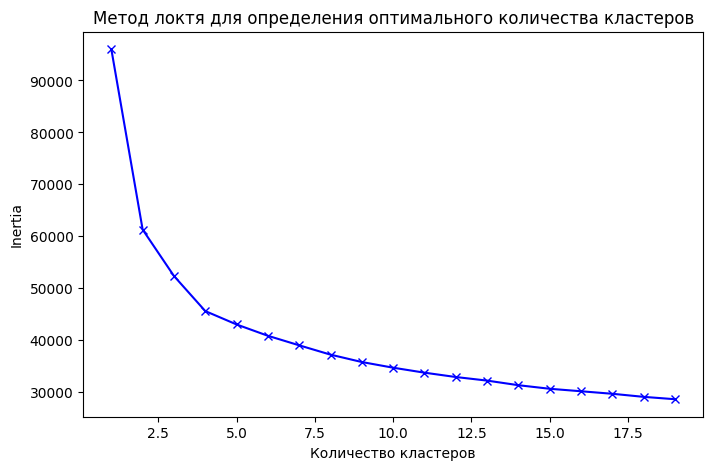

In [ ]:
# Кластеризация с использованием K-means
#kmeans = KMeans(n_clusters=3, random_state=42)  # Замените 5 на желаемое количество кластеров
#data['cluster'] = kmeans.fit_predict(cluster_data)

# Определяем оптимальное количество кластеров используя метод локтя
inertia = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

# Построим график метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.show()

In [ ]:
# Применяем K-Means с выбранным количеством кластеров
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_final_cluster = data_final
data_final_cluster['Cluster'] = kmeans.fit_predict(cluster_data)

# Выводим количество элементов в каждом кластере
print(data_final_cluster['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
1    8545
2    7901
3    3533
0    3005
Name: count, dtype: int64


### регионализация

In [ ]:
data_final['geometry']

0        POINT (37.64917 55.72516)
1        POINT (37.64917 55.72516)
2        POINT (37.59638 55.74000)
3        POINT (37.64341 55.75886)
4        POINT (37.65181 55.77228)
                   ...            
22981    POINT (37.63328 55.75777)
22982    POINT (37.76785 55.65237)
22983    POINT (37.76568 55.69975)
22984    POINT (37.76568 55.69975)
22985    POINT (37.76568 55.69975)
Name: geometry, Length: 22984, dtype: geometry

In [ ]:
# Создание весовой матрицы для регионализации
w = Queen.from_dataframe(data_final)

# Вычисление индекса Морана для каждой переменной
moran_results = {var: Moran(data_final[var], w) for var in columns_cluster}

# Регионализация на основе кластеров и пространственных ограничений
# Здесь можно использовать различные алгоритмы, такие как пространственно ограниченная иерархическая кластеризация

# Пример: вычисление пространственно ограниченной иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
data_final['region'] = agg_clustering.fit_predict(cluster_data)


<ipython-input-551-3d7222b60485>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(data_final)


In [ ]:
# Выводим количество элементов в каждом кластере
print(data_final['region'].value_counts())

region
2    8987
3    6314
0    3892
1    3791
Name: count, dtype: int64


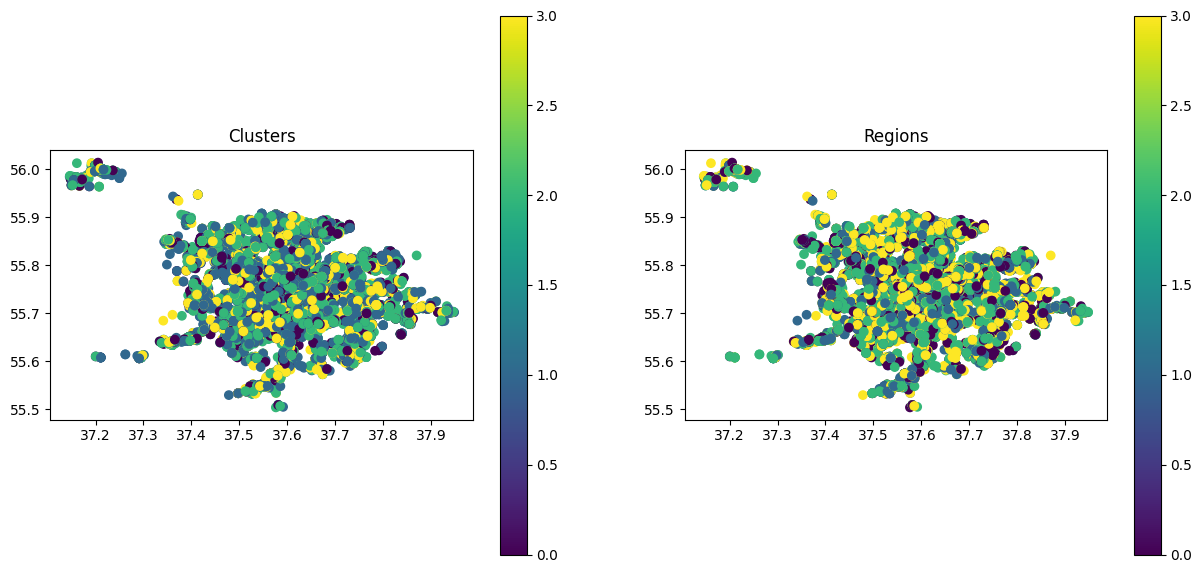

In [ ]:
# Визуализация кластеров и регионов
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
data_final_cluster.plot(column='Cluster', cmap='viridis', legend=True, ax=ax[0])
ax[0].set_title('Clusters')
data_final.plot(column='region', cmap='viridis', legend=True, ax=ax[1])
ax[1].set_title('Regions')
plt.show()

In [ ]:
import pandas as pd

# Группируем данные по кластеру и вычисляем среднюю оценку отзывов для каждого кластера
mean_ratings = data_final_cluster.groupby('region')['rating'].mean()

# Выводим результаты
print(mean_ratings)

region
0    3.236896
1    3.830388
2    4.934350
3    4.703199
Name: rating, dtype: float64


In [ ]:
import pandas as pd

# Группируем данные по кластеру и вычисляем среднюю оценку отзывов для каждого кластера
mean_ratings = data_final_cluster.groupby('region')['rating'].median()

# Выводим результаты
print(mean_ratings)

region
0    3.0
1    5.0
2    5.0
3    5.0
Name: rating, dtype: float64


In [ ]:
data_final.head()

,name,neutral,positive,negative,rating,персонал_sentiment_negative,персонал_sentiment_neutral,персонал_sentiment_positive,меню_sentiment_negative,меню_sentiment_neutral,меню_sentiment_positive,цена_sentiment_negative,цена_sentiment_neutral,цена_sentiment_positive,маркетинг_sentiment_negative,маркетинг_sentiment_neutral,маркетинг_sentiment_positive,санитария_sentiment_negative,санитария_sentiment_neutral,санитария_sentiment_positive,месторасположение_sentiment_negative,месторасположение_sentiment_neutral,месторасположение_sentiment_positive,атмосфера_sentiment_negative,атмосфера_sentiment_neutral,атмосфера_sentiment_positive,еда_sentiment_negative,еда_sentiment_neutral,еда_sentiment_positive,персонал,цена,маркетинг,месторасположение,атмосфера,еда,санитария,меню,Европейская,Американская,Азиатская,Итальянская,Международная,СССР,Латино-американская,Восточная,Грузинская,Здоровая,Кавказская,Африканская,Австралийская,Канадская,Новозеландская,Китайская,Шавермочная,Кальяночная,Гриль и шашлык,Ресторан,Фастфуд,Кафе,"Бар, паб, пиво, вино",Кофе и чай,Пицца,Суши,Пекарня,Десерты,Столовая,Другое,Бургеры,Магазин,geometry,dist_center_in_m,square_land,street_length,square_living,population,women_before_work_age,women_work_age,women_after_work_age,men_before_work_age,men_work_age,men_after_work_age,working_people_all,average_salary_all,square_catering_hall,number_of_seat_catering,share_unprofit_org_catering_and_hotels,share_unprofit_org_all,revenue_all,revenue_catering_and_hotels,neigh_total,competitiveness_cuisine,competitiveness_type,neigh_count_Образование,neigh_count_Хобби,neigh_count_Доп образование,neigh_count_Досуг,neigh_count_Транспорт,neigh_count_Общественный транспорт,neigh_count_Офисы,neigh_count_Здоровье,neigh_count_Социальное,neigh_count_Государственное,neigh_count_Нежелательное,neigh_count_Религия,neigh_count_Жилье,neigh_count_Магазины,neigh_count_Спорт,neigh_count_Дороги,neigh_count_Европейская,neigh_count_Американская,neigh_count_Азиатская,neigh_count_Итальянская,neigh_count_Международная,neigh_count_СССР,neigh_count_Латино-американская,neigh_count_Восточная,neigh_count_Грузинская,neigh_count_Здоровая,neigh_count_Кавказская,neigh_count_Африканская,neigh_count_Австралийская,neigh_count_Канадская,neigh_count_Новозеландская,neigh_count_Китайская,neigh_count_Шавермочная,neigh_count_Кальяночная,neigh_count_Гриль и шашлык,neigh_count_Ресторан,neigh_count_Фастфуд,neigh_count_Кафе,"neigh_count_Бар, паб, пиво, вино",neigh_count_Кофе и чай,neigh_count_Пицца,neigh_count_Суши,neigh_count_Пекарня,neigh_count_Десерты,neigh_count_Столовая,neigh_count_Другое,neigh_count_Бургеры,neigh_count_Магазин,entropy_y,entropy_cuisine,entropy_type,middle,cheap,expensive,Южный,Центральный,Юго-Западный,Северный,Северо-Западный,Западный,Восточный,Северо-Восточный,Юго-Восточный,Зеленоградский,Cluster,region
0,Jinju,-0.355244,-0.521506,0.532572,5,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.64917 55.72516),-0.571956,0.775254,0.456462,-0.055069,0.181550,0.026089,0.078294,0.156286,0.037137,0.314156,0.406462,0.099985,0.221937,-0.038180,-0.095295,-0.012416,0.284907,-0.182517,0.027249,-0.690483,0.062500,0.312500,-1.094411,-0.411853,-0.824550,-0.913374,-0.617083,-0.163857,0.342891,-1.018524,-0.802607,-0.563167,-0.195373,-0.437073,-0.382316,-0.890239,-0.232044,-0.369367,-0.634318,-0.501777,-0.707256,-0.996171,-0.658370,-0.788496,-0.479804,-0.777972,-0.813117,2.261526,-0.674024,-0.160042,-0.170057,-0.035544,0,0,1.041920,0.297304,-0.804510,-0.174872,-0.042469,-0.962770,-0.557653,0.140622,-0.815973,-0.551835,-0.688773,-0.684604,1.919095,-0.169945,0,-0.34176,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,2,0
1,Jinju,-0.159213,-0.070789,-0.430850,4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.64917 55.72516),-0.571956,0.775254,0.456462,-0.055069,0.181550,0.026089,0.078294,0.156286,0.037137,0.314156,0.4064

In [ ]:
data_final.to_csv('data_final.csv', index=False)

# Regression

Делаем нормальные колонки по кластерам

In [ ]:
data_final.drop(columns=['region0','region1','region2','region3','Cluster'], inplace=True)

## Model 4+5

### Попытки подобрать переменные

In [ ]:
data_final['class'] = 0

for i in range(0, len(data_final)):
    if data_final.iloc[i, data_final.columns.get_loc('rating')] < 4:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 0
    else:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 1

In [ ]:
data_final=data_final.drop(columns=['еда_sentiment_neutral','neutral','персонал_sentiment_neutral','меню_sentiment_neutral',
                                    'цена_sentiment_neutral','маркетинг_sentiment_neutral','санитария_sentiment_neutral',
                                    'месторасположение_sentiment_neutral','атмосфера_sentiment_neutral'])

In [ ]:
X = data_final.drop(columns=['name', 'rating', 'class','geometry'])
y = data_final['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train=X

In [ ]:
y_train=y

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.shape

#### итерация 1

In [ ]:
columns_for_model = X_train.iloc[:,0:60].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22924
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5656.8
Date:                Thu, 06 Jun 2024   Deviance:                       11314.
Time:                        20:00:40   Pearson chi2:                 3.00e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22964
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5673.4
Date:                Thu, 06 Jun 2024   Deviance:                       11347.
Time:                        20:00:41   Pearson chi2:                 3.02e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3260
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
positive        

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22966
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5676.4
Date:                Thu, 06 Jun 2024   Deviance:                       11353.
Time:                        20:00:41   Pearson chi2:                 3.03e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3258
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
positive        

In [ ]:
filtered_variables_1 = selected_columns.tolist()

####итерация 2

In [ ]:
columns_for_model = X_train.iloc[:,61:120].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22925
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10116.
Date:                Thu, 06 Jun 2024   Deviance:                       20233.
Time:                        20:00:51   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.007831
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22964
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10134.
Date:                Thu, 06 Jun 2024   Deviance:                       20269.
Time:                        20:00:51   Pearson chi2:                 2.30e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.006278
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
women_before_work_

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22967
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10139.
Date:                Thu, 06 Jun 2024   Deviance:                       20278.
Time:                        20:00:51   Pearson chi2:                 2.30e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.005873
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
women_before_work_

In [ ]:
filtered_variables_2 = selected_columns.tolist()

#### итерация 3

In [ ]:
columns_for_model = X_train.iloc[:,120:155].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22965
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10174.
Date:                Thu, 06 Jun 2024   Deviance:                       20349.
Time:                        20:00:53   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.002828
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
neigh_count_Пицца        0.0836 

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22975
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10182.
Date:                Thu, 06 Jun 2024   Deviance:                       20364.
Time:                        20:00:54   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.002164
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
neigh_count_Пицца       0.0533    

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22978
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10184.
Date:                Thu, 06 Jun 2024   Deviance:                       20369.
Time:                        20:00:55   Pearson chi2:                 2.31e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.001944
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
neigh_count_Пицца       0.0540    

In [ ]:
filtered_variables_3 = selected_columns.tolist()

Соединяем все отобранные переменные

In [ ]:
combined_variables = filtered_variables_1 + filtered_variables_2 + filtered_variables_3

In [ ]:
def get_unique_numbers(numbers):
    list_of_unique_numbers = []
    unique_numbers = set(numbers)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers

combined_variables=get_unique_numbers(combined_variables)
combined_variables

['neigh_count_Нежелательное',
 'neigh_count_Магазины',
 'Кафе',
 'revenue_all',
 'neigh_count_Новозеландская',
 'expensive',
 'competitiveness_type',
 'neigh_count_Доп образование',
 'neigh_count_Кальяночная',
 'neigh_count_Кафе',
 'санитария',
 'neigh_count_Пекарня',
 'меню_sentiment_negative',
 'атмосфера_sentiment_negative',
 'Латино-американская',
 'neigh_total',
 'Суши',
 'middle',
 'меню_sentiment_positive',
 'neigh_count_Фастфуд',
 'еда',
 'атмосфера',
 'персонал',
 'Шавермочная',
 'working_people_all',
 'neigh_count_Международная',
 'Кофе и чай',
 'men_before_work_age',
 'neigh_count_Пицца',
 'cheap',
 'атмосфера_sentiment_positive',
 'Северо-Западный',
 'neigh_count_Государственное',
 'negative',
 'neigh_count_Китайская',
 'women_before_work_age',
 'positive',
 'персонал_sentiment_positive']

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[combined_variables],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22948
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5659.2
Date:                Thu, 06 Jun 2024   Deviance:                       11318.
Time:                        20:00:55   Pearson chi2:                 2.99e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3268
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Неже

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22965
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5670.6
Date:                Thu, 06 Jun 2024   Deviance:                       11341.
Time:                        20:00:56   Pearson chi2:                 3.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3261
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Кафе            

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22967
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5672.7
Date:                Thu, 06 Jun 2024   Deviance:                       11345.
Time:                        20:00:56   Pearson chi2:                 3.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3260
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Ново

## Interaction effect

#### интерэкшн между кухней и количеством заведение с этой кухней в ромашке

In [ ]:
list_1 = ['Европейская',
 'Американская',
 'Азиатская',
 'Итальянская',
 'Международная',
 'СССР',
 'Латино-американская',
 'Восточная',
 'Грузинская',
 'Здоровая',
 'Кавказская',
 'Африканская',
 'Австралийская',
 'Шавермочная',
 'Кальяночная',
 'Гриль и шашлык',
 'Ресторан',
 'Фастфуд',
 'Кафе',
 'Бар, паб, пиво, вино',
 'Кофе и чай',
 'Пицца',
 'Суши',
 'Пекарня',
 'Десерты',
 'Столовая',
 'Другое',
 'Магазин']

list_2 = ['neigh_count_Европейская',
 'neigh_count_Американская',
 'neigh_count_Азиатская',
 'neigh_count_Итальянская',
 'neigh_count_Международная',
 'neigh_count_СССР',
 'neigh_count_Латино-американская',
 'neigh_count_Восточная',
 'neigh_count_Грузинская',
 'neigh_count_Здоровая',
 'neigh_count_Кавказская',
 'neigh_count_Африканская',
 'neigh_count_Австралийская',
 'neigh_count_Канадская',
 'neigh_count_Шавермочная',
 'neigh_count_Кальяночная',
 'neigh_count_Гриль и шашлык',
 'neigh_count_Ресторан',
 'neigh_count_Фастфуд',
 'neigh_count_Кафе',
 'neigh_count_Бар, паб, пиво, вино',
 'neigh_count_Кофе и чай',
 'neigh_count_Пицца',
 'neigh_count_Суши',
 'neigh_count_Пекарня',
 'neigh_count_Десерты',
 'neigh_count_Столовая',
 'neigh_count_Другое',
 'neigh_count_Магазин']

In [ ]:
X_train_interact = X_train.copy()

inter_columns = []

for i in range(0, len(list_1)):
  a = list_1[i]
  b = list_2[i]
  name_column = 'int_' + a
  inter_columns.append(name_column)
  X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22940
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5656.3
Date:                Thu, 06 Jun 2024   Deviance:                       11313.
Time:                        20:00:57   Pearson chi2:                 3.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3270
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Ново

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22964
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5666.4
Date:                Thu, 06 Jun 2024   Deviance:                       11333.
Time:                        20:00:57   Pearson chi2:                 3.01e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3264
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Ново

#### интерэкшн между расстоянием от центра и отзывами

In [ ]:
list_1 = ['positive',
 'negative',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['dist_center_in_m']

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
  a = list_1[i]
  b = list_2[0]
  name_column = 'int_' + a + b
  inter_columns.append(name_column)
  X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22954
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5660.5
Date:                Thu, 06 Jun 2024   Deviance:                       11321.
Time:                        20:00:57   Pearson chi2:                 3.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3267
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22964
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5666.4
Date:                Thu, 06 Jun 2024   Deviance:                       11333.
Time:                        20:00:57   Pearson chi2:                 3.01e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3264
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Ново

#### интерэкшн между

In [ ]:
list_1 = [
 'positive',
 'negative',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['neigh_count_Образование',
 'neigh_count_Хобби',
 'neigh_count_Доп образование',
 'neigh_count_Досуг',
 'neigh_count_Транспорт',
 'neigh_count_Общественный транспорт',
 'neigh_count_Офисы',
 'neigh_count_Здоровье',
 'neigh_count_Социальное',
 'neigh_count_Государственное',
 'neigh_count_Нежелательное',
 'neigh_count_Религия',
 'neigh_count_Жилье',
 'neigh_count_Магазины',
 'neigh_count_Спорт',
 'neigh_count_Дороги']

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
  for j in range(0, len(list_2)):
    a = list_1[i]
    b = list_2[j]
    name_column = 'int_' + a + b
    inter_columns.append(name_column)
    X_train_interact[name_column] = X_train[a] * X_train[b]

<ipython-input-855-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_interact[name_column] = X_train[a] * X_train[b]
<ipython-input-855-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_interact[name_column] = X_train[a] * X_train[b]
<ipython-input-855-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22804
Model Family:                Binomial   Df Model:                          179
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5586.2
Date:                Thu, 06 Jun 2024   Deviance:                       11172.
Time:                        20:01:38   Pearson chi2:                 3.01e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3311
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22956
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5651.0
Date:                Thu, 06 Jun 2024   Deviance:                       11302.
Time:                        20:01:38   Pearson chi2:                 2.96e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3273
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22960
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5657.1
Date:                Thu, 06 Jun 2024   Deviance:                       11314.
Time:                        20:01:38   Pearson chi2:                 3.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22961
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5658.6
Date:                Thu, 06 Jun 2024   Deviance:                       11317.
Time:                        20:01:38   Pearson chi2:                 2.99e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3268
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### интерэкшн между отзывом и компетитивнесс кухни

In [ ]:
list_1 = [
 'positive',
 'negative',
 'персонал_sentiment_negative',
 'персонал_sentiment_positive',
 'меню_sentiment_negative',
 'меню_sentiment_positive',
 'цена_sentiment_negative',
 'цена_sentiment_positive',
 'маркетинг_sentiment_negative',
 'маркетинг_sentiment_positive',
 'санитария_sentiment_negative',
 'санитария_sentiment_positive',
 'месторасположение_sentiment_negative',
 'месторасположение_sentiment_positive',
 'атмосфера_sentiment_negative',
 'атмосфера_sentiment_positive',
 'еда_sentiment_negative',
 'еда_sentiment_positive',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['neigh_total', 'competitiveness_cuisine', 'competitiveness_type']

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
    a = list_1[i]
    b = list_2[0]
    name_column = 'int_' + a + b
    inter_columns.append(name_column)
    X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
len(inter_columns)

26

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22935
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5639.7
Date:                Thu, 06 Jun 2024   Deviance:                       11279.
Time:                        20:01:39   Pearson chi2:                 3.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3279
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22958
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5653.2
Date:                Thu, 06 Jun 2024   Deviance:                       11306.
Time:                        20:01:39   Pearson chi2:                 2.98e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3272
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22960
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5655.0
Date:                Thu, 06 Jun 2024   Deviance:                       11310.
Time:                        20:01:40   Pearson chi2:                 2.98e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3271
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

## Model's metrics

Accuracy: 0.8977114514444832
Recall: 0.9610808002078461
F1-score: 0.9402434994789417
AUC: 0.9227860353651216


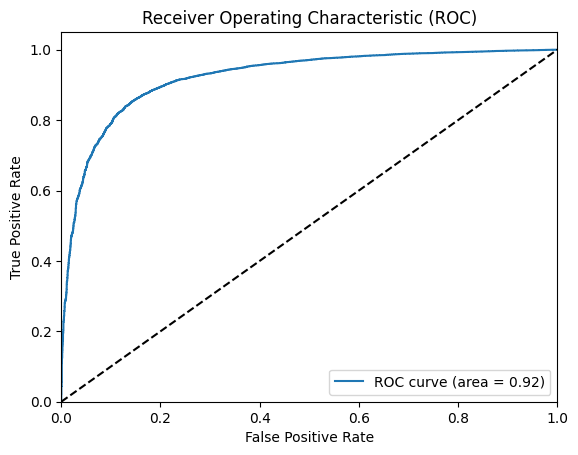

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Предсказание вероятностей на тестовом наборе данных
y_pred_probs = model_glm_filtered.predict(X_train_interact[selected_columns])

# Конвертация предсказанных вероятностей в классы на основе порога 0.5
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

# Вычисление метрик
accuracy = accuracy_score(y_train, y_pred_classes)
recall = recall_score(y_train, y_pred_classes)
f1 = f1_score(y_train, y_pred_classes)

# Вычисление AUC и построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
auc = roc_auc_score(y_train, y_pred_probs)

# Вывод метрик
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Линия для случайного классификатора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


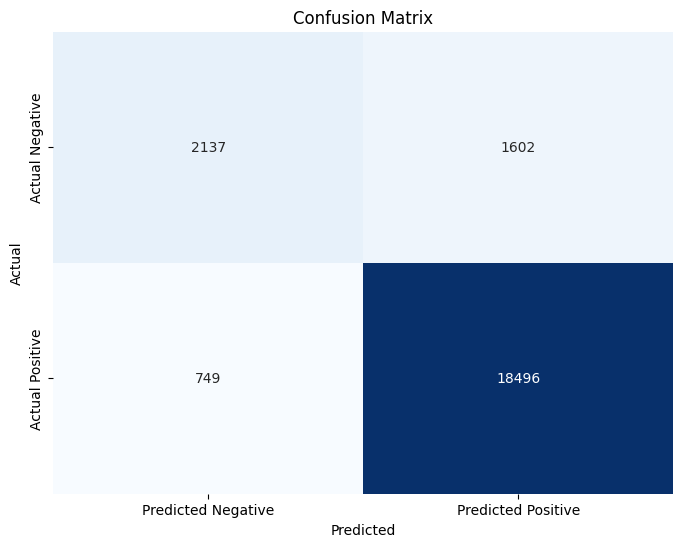

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказание вероятностей на тестовом наборе данных
y_pred_probs = model_glm_filtered.predict(X_train_interact[selected_columns])

# Конвертация предсказанных вероятностей в классы на основе порога 0.5
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

# Вычисление матрицы неточностей
cm = confusion_matrix(y_train, y_pred_classes)

# Визуализация матрицы неточностей
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Model 5 or not

In [ ]:
data_final['class'] = 0

for i in range(0, len(data_final)):
    if data_final.iloc[i, data_final.columns.get_loc('rating')] < 5:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 0
    else:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 1

In [ ]:
X = data_final.drop(columns=['name', 'rating', 'class','geometry'])
y = data_final['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train=X

In [ ]:
y_train=y

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.shape

(22984, 144)

#### итерация 1

In [ ]:
columns_for_model = X_train.iloc[:,0:60].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22924
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8242.4
Date:                Thu, 06 Jun 2024   Deviance:                       16485.
Time:                        19:55:14   Pearson chi2:                 2.78e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3400
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22962
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8261.5
Date:                Thu, 06 Jun 2024   Deviance:                       16523.
Time:                        19:55:14   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3389
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
positive        

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22962
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8261.5
Date:                Thu, 06 Jun 2024   Deviance:                       16523.
Time:                        19:55:14   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3389
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
positive        

In [ ]:
filtered_variables_1 = selected_columns.tolist()

####итерация 2

In [ ]:
columns_for_model = X_train.iloc[:,61:120].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22925
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12933.
Date:                Thu, 06 Jun 2024   Deviance:                       25866.
Time:                        19:55:24   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.007316
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22968
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12957.
Date:                Thu, 06 Jun 2024   Deviance:                       25914.
Time:                        19:55:25   Pearson chi2:                 2.30e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.005242
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
working_people_all

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22970
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12959.
Date:                Thu, 06 Jun 2024   Deviance:                       25918.
Time:                        19:55:25   Pearson chi2:                 2.30e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.005077
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
working_people_all

In [ ]:
filtered_variables_2 = selected_columns.tolist()

#### итерация 3

In [ ]:
columns_for_model = X_train.iloc[:,120:155].columns.to_list()
columns_for_model += ['middle', 'cheap', 'expensive']

In [ ]:
model_glm = sm.GLM(
    y_train, X_train[columns_for_model],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22965
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12989.
Date:                Thu, 06 Jun 2024   Deviance:                       25977.
Time:                        19:55:29   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.002493
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
neigh_count_Пицца        0.0687 

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22976
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12994.
Date:                Thu, 06 Jun 2024   Deviance:                       25988.
Time:                        19:55:31   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.002009
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
neigh_count_Пицца       0.0448    

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22978
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12996.
Date:                Thu, 06 Jun 2024   Deviance:                       25992.
Time:                        19:55:32   Pearson chi2:                 2.30e+04
No. Iterations:                   100   Pseudo R-squ. (CS):           0.001842
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
neigh_count_Пицца       0.0517    

In [ ]:
filtered_variables_3 = selected_columns.tolist()

Соединяем все отобранные переменные

In [ ]:
combined_variables = filtered_variables_1 + filtered_variables_2 + filtered_variables_3

In [ ]:
def get_unique_numbers(numbers):
    list_of_unique_numbers = []
    unique_numbers = set(numbers)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers

combined_variables=get_unique_numbers(combined_variables)
combined_variables

['neigh_count_Нежелательное',
 'neigh_count_Магазины',
 'Кафе',
 'revenue_all',
 'Юго-Западный',
 'neigh_count_Кальяночная',
 'neigh_count_Доп образование',
 'цена_sentiment_positive',
 'neigh_count_Кафе',
 'санитария',
 'neigh_count_Пекарня',
 'меню_sentiment_negative',
 'Кальяночная',
 'атмосфера_sentiment_negative',
 'neigh_total',
 'Суши',
 'middle',
 'меню_sentiment_positive',
 'neigh_count_Фастфуд',
 'еда',
 'neigh_count_Австралийская',
 'атмосфера',
 'neigh_count_Шавермочная',
 'Восточная',
 'персонал',
 'цена',
 'working_people_all',
 'Кофе и чай',
 'neigh_count_Пицца',
 'cheap',
 'атмосфера_sentiment_positive',
 'месторасположение',
 'neigh_count_Государственное',
 'персонал_sentiment_negative',
 'Европейская',
 'negative',
 'neigh_count_Китайская',
 'positive',
 'Восточный',
 'персонал_sentiment_positive']

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[combined_variables],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22945
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8234.0
Date:                Thu, 06 Jun 2024   Deviance:                       16468.
Time:                        19:55:33   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3405
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Неже

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22958
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8241.2
Date:                Thu, 06 Jun 2024   Deviance:                       16482.
Time:                        19:55:34   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3401
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Неже

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train, X_train[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22959
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8242.8
Date:                Thu, 06 Jun 2024   Deviance:                       16486.
Time:                        19:55:34   Pearson chi2:                 2.79e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3400
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Неже

## Interaction effect

In [ ]:
data_final.columns.to_list()

#### интерэкшн между кухней и количеством заведение с этой кухней в ромашке (не прогонять)

In [ ]:
list_1 = ['Европейская',
 'Американская',
 'Азиатская',
 'Итальянская',
 'Международная',
 'СССР',
 'Латино-американская',
 'Восточная',
 'Грузинская',
 'Здоровая',
 'Кавказская',
 'Африканская',
 'Австралийская',
 'Шавермочная',
 'Кальяночная',
 'Гриль и шашлык',
 'Ресторан',
 'Фастфуд',
 'Кафе',
 'Бар, паб, пиво, вино',
 'Кофе и чай',
 'Пицца',
 'Суши',
 'Пекарня',
 'Десерты',
 'Столовая',
 'Другое',
 'Магазин']

list_2 = ['neigh_count_Европейская',
 'neigh_count_Американская',
 'neigh_count_Азиатская',
 'neigh_count_Итальянская',
 'neigh_count_Международная',
 'neigh_count_СССР',
 'neigh_count_Латино-американская',
 'neigh_count_Восточная',
 'neigh_count_Грузинская',
 'neigh_count_Здоровая',
 'neigh_count_Кавказская',
 'neigh_count_Африканская',
 'neigh_count_Австралийская',
 'neigh_count_Канадская',
 'neigh_count_Шавермочная',
 'neigh_count_Кальяночная',
 'neigh_count_Гриль и шашлык',
 'neigh_count_Ресторан',
 'neigh_count_Фастфуд',
 'neigh_count_Кафе',
 'neigh_count_Бар, паб, пиво, вино',
 'neigh_count_Кофе и чай',
 'neigh_count_Пицца',
 'neigh_count_Суши',
 'neigh_count_Пекарня',
 'neigh_count_Десерты',
 'neigh_count_Столовая',
 'neigh_count_Другое',
 'neigh_count_Магазин']

In [ ]:
X_train_interact = X_train.copy()

inter_columns = []

for i in range(0, len(list_1)):
  a = list_1[i]
  b = list_2[i]
  name_column = 'int_' + a
  inter_columns.append(name_column)
  X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22931
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8219.8
Date:                Thu, 06 Jun 2024   Deviance:                       16440.
Time:                        19:55:35   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3413
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Неже

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22957
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8239.2
Date:                Thu, 06 Jun 2024   Deviance:                       16478.
Time:                        19:55:36   Pearson chi2:                 2.79e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Мага

#### интерэкшн между расстоянием от центра и отзывами

In [ ]:
list_1 = [
 'positive',
 'negative',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['dist_center_in_m']

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
  a = list_1[i]
  b = list_2[0]
  name_column = 'int_' + a + b
  inter_columns.append(name_column)
  X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22947
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8234.4
Date:                Thu, 06 Jun 2024   Deviance:                       16469.
Time:                        19:55:37   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3404
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22956
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8238.2
Date:                Thu, 06 Jun 2024   Deviance:                       16476.
Time:                        19:55:37   Pearson chi2:                 2.79e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
neigh_count_Мага

#### интерэкшн между

In [ ]:
list_1 = [
 'positive',
 'negative',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['neigh_count_Образование',
 'neigh_count_Хобби',
 'neigh_count_Доп образование',
 'neigh_count_Досуг',
 'neigh_count_Транспорт',
 'neigh_count_Общественный транспорт',
 'neigh_count_Офисы',
 'neigh_count_Здоровье',
 'neigh_count_Социальное',
 'neigh_count_Государственное',
 'neigh_count_Нежелательное',
 'neigh_count_Религия',
 'neigh_count_Жилье',
 'neigh_count_Магазины',
 'neigh_count_Спорт',
 'neigh_count_Дороги']

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
  for j in range(0, len(list_2)):
    a = list_1[i]
    b = list_2[j]
    name_column = 'int_' + a + b
    inter_columns.append(name_column)
    X_train_interact[name_column] = X_train[a] * X_train[b]

<ipython-input-741-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_interact[name_column] = X_train[a] * X_train[b]
<ipython-input-741-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_interact[name_column] = X_train[a] * X_train[b]
<ipython-input-741-fe6098798e4a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22796
Model Family:                Binomial   Df Model:                          187
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8154.2
Date:                Thu, 06 Jun 2024   Deviance:                       16308.
Time:                        19:55:45   Pearson chi2:                 2.76e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3450
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22949
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8218.1
Date:                Thu, 06 Jun 2024   Deviance:                       16436.
Time:                        19:55:46   Pearson chi2:                 2.80e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3414
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22952
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8220.9
Date:                Thu, 06 Jun 2024   Deviance:                       16442.
Time:                        19:55:46   Pearson chi2:                 2.80e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3412
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22952
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8220.9
Date:                Thu, 06 Jun 2024   Deviance:                       16442.
Time:                        19:55:46   Pearson chi2:                 2.80e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3412
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

#### интерэкшн между отзывом и кол-вом ресторанов

In [ ]:
list_1 = [
 'positive',
 'negative',
 'персонал_sentiment_negative',
 'персонал_sentiment_positive',
 'меню_sentiment_negative',
 'меню_sentiment_positive',
 'цена_sentiment_negative',
 'цена_sentiment_positive',
 'маркетинг_sentiment_negative',
 'маркетинг_sentiment_positive',
 'санитария_sentiment_negative',
 'санитария_sentiment_positive',
 'месторасположение_sentiment_negative',
 'месторасположение_sentiment_positive',
 'атмосфера_sentiment_negative',
 'атмосфера_sentiment_positive',
 'еда_sentiment_negative',
 'еда_sentiment_positive',
 'персонал',
 'цена',
 'маркетинг',
 'месторасположение',
 'атмосфера',
 'еда',
 'санитария',
 'меню']

list_2 = ['neigh_total',
          'competitiveness_cuisine',
          'competitiveness_type',
          ]

In [ ]:
inter_columns = []
for i in range(0, len(list_1)):
  for j in range(0, len(list_2)):
    a = list_1[i]
    b = list_2[j]
    name_column = 'int_' + a + b
    inter_columns.append(name_column)
    X_train_interact[name_column] = X_train[a] * X_train[b]

In [ ]:
len(inter_columns)

78

In [ ]:
# Добавляем константу (если требуется)
X_train_interact = sm.add_constant(X_train_interact)

# Создаем и обучаем модель
model_glm = sm.GLM(
    y_train, X_train_interact[selected_columns.to_list() + inter_columns],
    family=families.Binomial(),
).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22874
Model Family:                Binomial   Df Model:                          109
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8190.8
Date:                Thu, 06 Jun 2024   Deviance:                       16382.
Time:                        19:55:50   Pearson chi2:                 2.78e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22953
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8225.9
Date:                Thu, 06 Jun 2024   Deviance:                       16452.
Time:                        19:55:50   Pearson chi2:                 2.81e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3409
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families

# Получение p-values для всех признаков
p_values = model_glm_filtered.pvalues

# Отбор признаков с p-value < 0.06
selected_columns = p_values[p_values < 0.06].index

# Обучение модели с отобранными признаками
model_glm_filtered = sm.GLM(
    y_train,  X_train_interact[selected_columns],
    family=families.Binomial(),
).fit()

# Вывод результатов модели
print(model_glm_filtered.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                22984
Model:                            GLM   Df Residuals:                    22953
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8225.9
Date:                Thu, 06 Jun 2024   Deviance:                       16452.
Time:                        19:55:51   Pearson chi2:                 2.81e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3409
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Model's metrics

Accuracy: 0.8537678384963453
Recall: 0.9393109077129365
F1-score: 0.9055500913306167
AUC: 0.8822592891042867


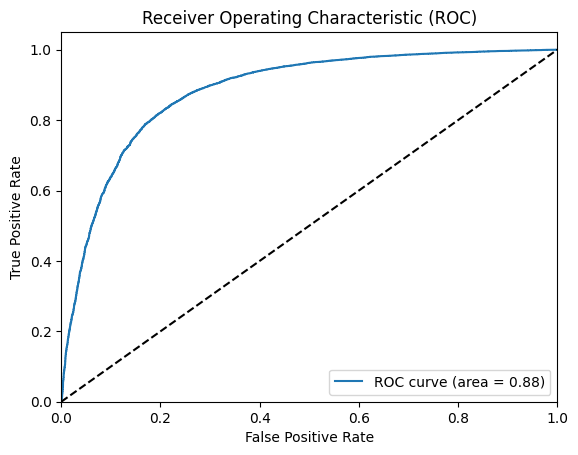

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Предсказание вероятностей на тестовом наборе данных
y_pred_probs = model_glm_filtered.predict(X_train_interact[selected_columns])

# Конвертация предсказанных вероятностей в классы на основе порога 0.5
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

# Вычисление метрик
accuracy = accuracy_score(y_train, y_pred_classes)
recall = recall_score(y_train, y_pred_classes)
f1 = f1_score(y_train, y_pred_classes)

# Вычисление AUC и построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
auc = roc_auc_score(y_train, y_pred_probs)

# Вывод метрик
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Линия для случайного классификатора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


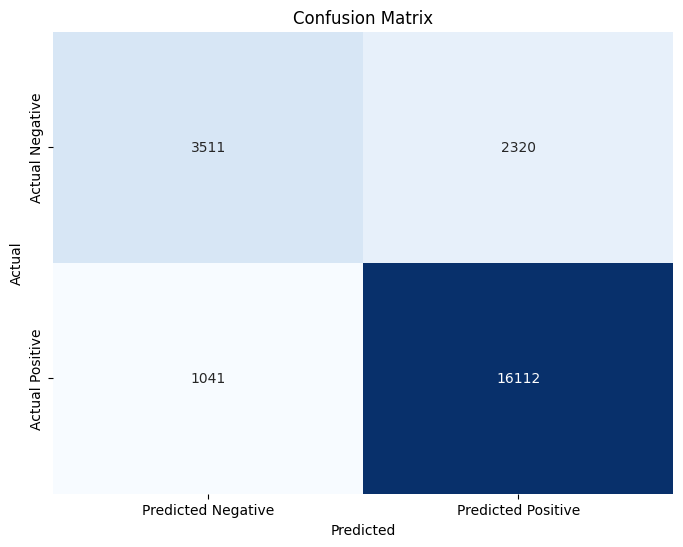

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказание вероятностей на тестовом наборе данных
y_pred_probs = model_glm_filtered.predict(X_train_interact[selected_columns])

# Конвертация предсказанных вероятностей в классы на основе порога 0.5
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

# Вычисление матрицы неточностей
cm = confusion_matrix(y_train, y_pred_classes)

# Визуализация матрицы неточностей
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree

In [ ]:
pd.set_option('display.max_columns', None)
data_final.head()

,name,neutral,positive,negative,rating,персонал_sentiment_negative,персонал_sentiment_neutral,персонал_sentiment_positive,меню_sentiment_negative,меню_sentiment_neutral,меню_sentiment_positive,цена_sentiment_negative,цена_sentiment_neutral,цена_sentiment_positive,маркетинг_sentiment_negative,маркетинг_sentiment_neutral,маркетинг_sentiment_positive,санитария_sentiment_negative,санитария_sentiment_neutral,санитария_sentiment_positive,месторасположение_sentiment_negative,месторасположение_sentiment_neutral,месторасположение_sentiment_positive,атмосфера_sentiment_negative,атмосфера_sentiment_neutral,атмосфера_sentiment_positive,еда_sentiment_negative,еда_sentiment_neutral,еда_sentiment_positive,персонал,цена,маркетинг,месторасположение,атмосфера,еда,санитария,меню,Европейская,Американская,Азиатская,Итальянская,Международная,СССР,Латино-американская,Восточная,Грузинская,Здоровая,Кавказская,Африканская,Австралийская,Канадская,Новозеландская,Китайская,Шавермочная,Кальяночная,Гриль и шашлык,Ресторан,Фастфуд,Кафе,"Бар, паб, пиво, вино",Кофе и чай,Пицца,Суши,Пекарня,Десерты,Столовая,Другое,Бургеры,Магазин,geometry,dist_center_in_m,square_land,street_length,square_living,population,women_before_work_age,women_work_age,women_after_work_age,men_before_work_age,men_work_age,men_after_work_age,working_people_all,average_salary_all,square_catering_hall,number_of_seat_catering,share_unprofit_org_catering_and_hotels,share_unprofit_org_all,revenue_all,revenue_catering_and_hotels,neigh_total,competitiveness_cuisine,competitiveness_type,neigh_count_Образование,neigh_count_Хобби,neigh_count_Доп образование,neigh_count_Досуг,neigh_count_Транспорт,neigh_count_Общественный транспорт,neigh_count_Офисы,neigh_count_Здоровье,neigh_count_Социальное,neigh_count_Государственное,neigh_count_Нежелательное,neigh_count_Религия,neigh_count_Жилье,neigh_count_Магазины,neigh_count_Спорт,neigh_count_Дороги,neigh_count_Европейская,neigh_count_Американская,neigh_count_Азиатская,neigh_count_Итальянская,neigh_count_Международная,neigh_count_СССР,neigh_count_Латино-американская,neigh_count_Восточная,neigh_count_Грузинская,neigh_count_Здоровая,neigh_count_Кавказская,neigh_count_Африканская,neigh_count_Австралийская,neigh_count_Канадская,neigh_count_Новозеландская,neigh_count_Китайская,neigh_count_Шавермочная,neigh_count_Кальяночная,neigh_count_Гриль и шашлык,neigh_count_Ресторан,neigh_count_Фастфуд,neigh_count_Кафе,"neigh_count_Бар, паб, пиво, вино",neigh_count_Кофе и чай,neigh_count_Пицца,neigh_count_Суши,neigh_count_Пекарня,neigh_count_Десерты,neigh_count_Столовая,neigh_count_Другое,neigh_count_Бургеры,neigh_count_Магазин,entropy_y,entropy_cuisine,entropy_type,middle,cheap,expensive,Южный,Центральный,Юго-Западный,Северный,Северо-Западный,Западный,Восточный,Северо-Восточный,Юго-Восточный,Зеленоградский
0,Jinju,0.160276,0.334599,0.206904,5,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.6491671 55.72515615),3581.909182,"1259,6",64,3449.4,105140,7327,27585,18871,7887,32970,10500,97423,"174730,8",59273,11004,"28,6",25,2194658184,26172675,3,0.062500,0.312500,4,0,0,0,0,0,35,5,0,3,0,2,1,0,0,48,3,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,2,4,0,0,0,0,1,5,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,Jinju,0.201823,0.468801,0.090103,4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,POINT (37.6491671 55.72515615),3581.909182,"1259,6",64,3449.4,105140,7327,27585,18871,7887,32970,10500,97423,"174730,8",59273,11004,"28,6",25,2194658184,26172675,3,0.062500,0.312500,4,0,0,0,0,0,35,5,0,3,0,2,1,0,0,48,3,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,2,4,0,0,0,0,1,5,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
2,Coffee Moose,0.100889,0.644235,0.036230,5,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,POINT (37.5963763 55.7400007),1893.034611,"1007,6","76,9",3260.1,1

In [ ]:
data_final.drop(columns=['geometry'], inplace=True)

In [ ]:
# Преобразование типа 'object' в тип 'int'
object_columns = data_final.select_dtypes(include=['object']).columns
data_final[object_columns] = data_final[object_columns].astype(int, errors='ignore')

# Преобразование типа 'float' в тип 'int'
float_columns = data_final.select_dtypes(include=['float']).columns
data_final[float_columns] = data_final[float_columns].astype(int, errors='ignore')

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_final.dtypes)

In [ ]:
data_final.drop(columns=['share_unprofit_org_catering_and_hotels',
'share_unprofit_org_all',
'average_salary_all',
'square_catering_hall',
'square_land',
'street_length'], inplace=True)

In [ ]:
#data_final.drop(columns=['positive','negative','neutral'], inplace=True)

In [ ]:
#data_final.drop(columns=['revenue_all'], inplace=True)

In [ ]:
data_final['class'] = 0

for i in range(0, len(data_final)):
    if data_final.iloc[i, data_final.columns.get_loc('rating')] < 5:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 0
    else:
        data_final.iloc[i, data_final.columns.get_loc('class')] = 1

In [ ]:
data_final['class'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Определяем признаки (X) и целевую переменную (y)
X = data_final.drop(columns=['name', 'rating','class'])  # Удаляем столбец 'name' и 'rating' из признаков
y = data_final['class']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
# list in which we store a set of different datasets for training and evaluating the model
# (dataset name, training set of features, deferred set of features)
# the training dataset should come first
X_y_datasets = [
    ('train', X_train, y_train),
    ('test', X_test, y_test)]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18387, 153), (4597, 153), (18387, 1), (4597, 1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Создание и обучение модели дерева решений
class_model = DecisionTreeClassifier(random_state=42, max_depth=7, max_features=150,
                                     criterion='entropy', splitter='random', min_samples_split=3)
class_model.fit(X_train, y_train['class'])

# Получение названий столбцов
train_columns = X_train.columns.tolist()

# Вывод правил дерева решений
tree_rules = export_text(class_model, feature_names=train_columns)
print(tree_rules)

# Прогнозирование вероятностей и добавление результатов в наборы данных
for name, X_, y_ in X_y_datasets:
    prob = class_model.predict_proba(X_)
    y_['__class_predict_decisiontree'] = prob[:, 1]

|--- positive <= -0.60
|   |--- меню_sentiment_neutral <= 0.03
|   |   |--- персонал <= 0.96
|   |   |   |--- neigh_count_Государственное <= 1.00
|   |   |   |   |--- negative <= 0.31
|   |   |   |   |   |--- Кофе и чай <= 0.13
|   |   |   |   |   |   |--- square_land <= 0.07
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- square_land >  0.07
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Кофе и чай >  0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- negative >  0.31
|   |   |   |   |   |--- neigh_count_Итальянская <= 0.41
|   |   |   |   |   |   |--- Западный <= 0.38
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Западный >  0.38
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- neigh_count_Итальянская >  0.41
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- neigh_count_Государственное >  1.00
|   |   |   |   |--- месторасположение <= 0.31
|   |   |   |   |   |--- middle <= 0.52
| 

In [ ]:
for name, X_, y_ in X_y_datasets:
    prob = class_model.predict_proba(X_)
    max_prob_class = prob.argmax(axis=1)
    y_['__class_predict_decisiontree'] = max_prob_class

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Оценка матрицы ошибок
conf_matrix = confusion_matrix(y_train['class'], y_train['__class_predict_decisiontree'])

# Оценка других метрик
class_report = classification_report(y_train['class'], y_train['__class_predict_decisiontree'])

print("Матрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(class_report)

Матрица ошибок:
[[ 2904  1754]
 [ 1357 12372]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      4658
           1       0.88      0.90      0.89     13729

    accuracy                           0.83     18387
   macro avg       0.78      0.76      0.77     18387
weighted avg       0.83      0.83      0.83     18387



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Оценка матрицы ошибок
conf_matrix = confusion_matrix(y_test['class'], y_test['__class_predict_decisiontree'])

# Оценка других метрик
class_report = classification_report(y_test['class'], y_test['__class_predict_decisiontree'])

print("Confusion matrix:")
print(conf_matrix)
print("\nReport about classification:")
print(class_report)

Confusion matrix:
[[ 726  447]
 [ 346 3078]]

Report about classification:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1173
           1       0.87      0.90      0.89      3424

    accuracy                           0.83      4597
   macro avg       0.78      0.76      0.77      4597
weighted avg       0.82      0.83      0.82      4597



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создаем модель решающего дерева с максимальной глубиной 5
class_model_pruned = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=140,
                                            criterion='entropy', splitter='random', min_samples_split=10)

# Обучаем модель на обучающих данных
class_model_pruned.fit(X_train, y_train['class'])

# Экспортируем структуру дерева в формате DOT
dot_data_pruned = export_graphviz(class_model_pruned, out_file=None, feature_names=train_columns, filled=True)

# Создаем граф для обрезанного дерева
pruned_graph = pydotplus.graph_from_dot_data(dot_data_pruned)

# Отображаем граф обрезанного дерева
Image(pruned_graph.create_png())


NameError: name 'export_graphviz' is not defined

In [ ]:
plt.figure(figsize=(20, 20))  # set plot size (denoted in inches)
from sklearn import tree

# Получение имен колонок
column_names = X_train.columns.tolist()

# Визуализация дерева
tree.plot_tree(class_model, feature_names=column_names, fontsize=10)
plt.show()

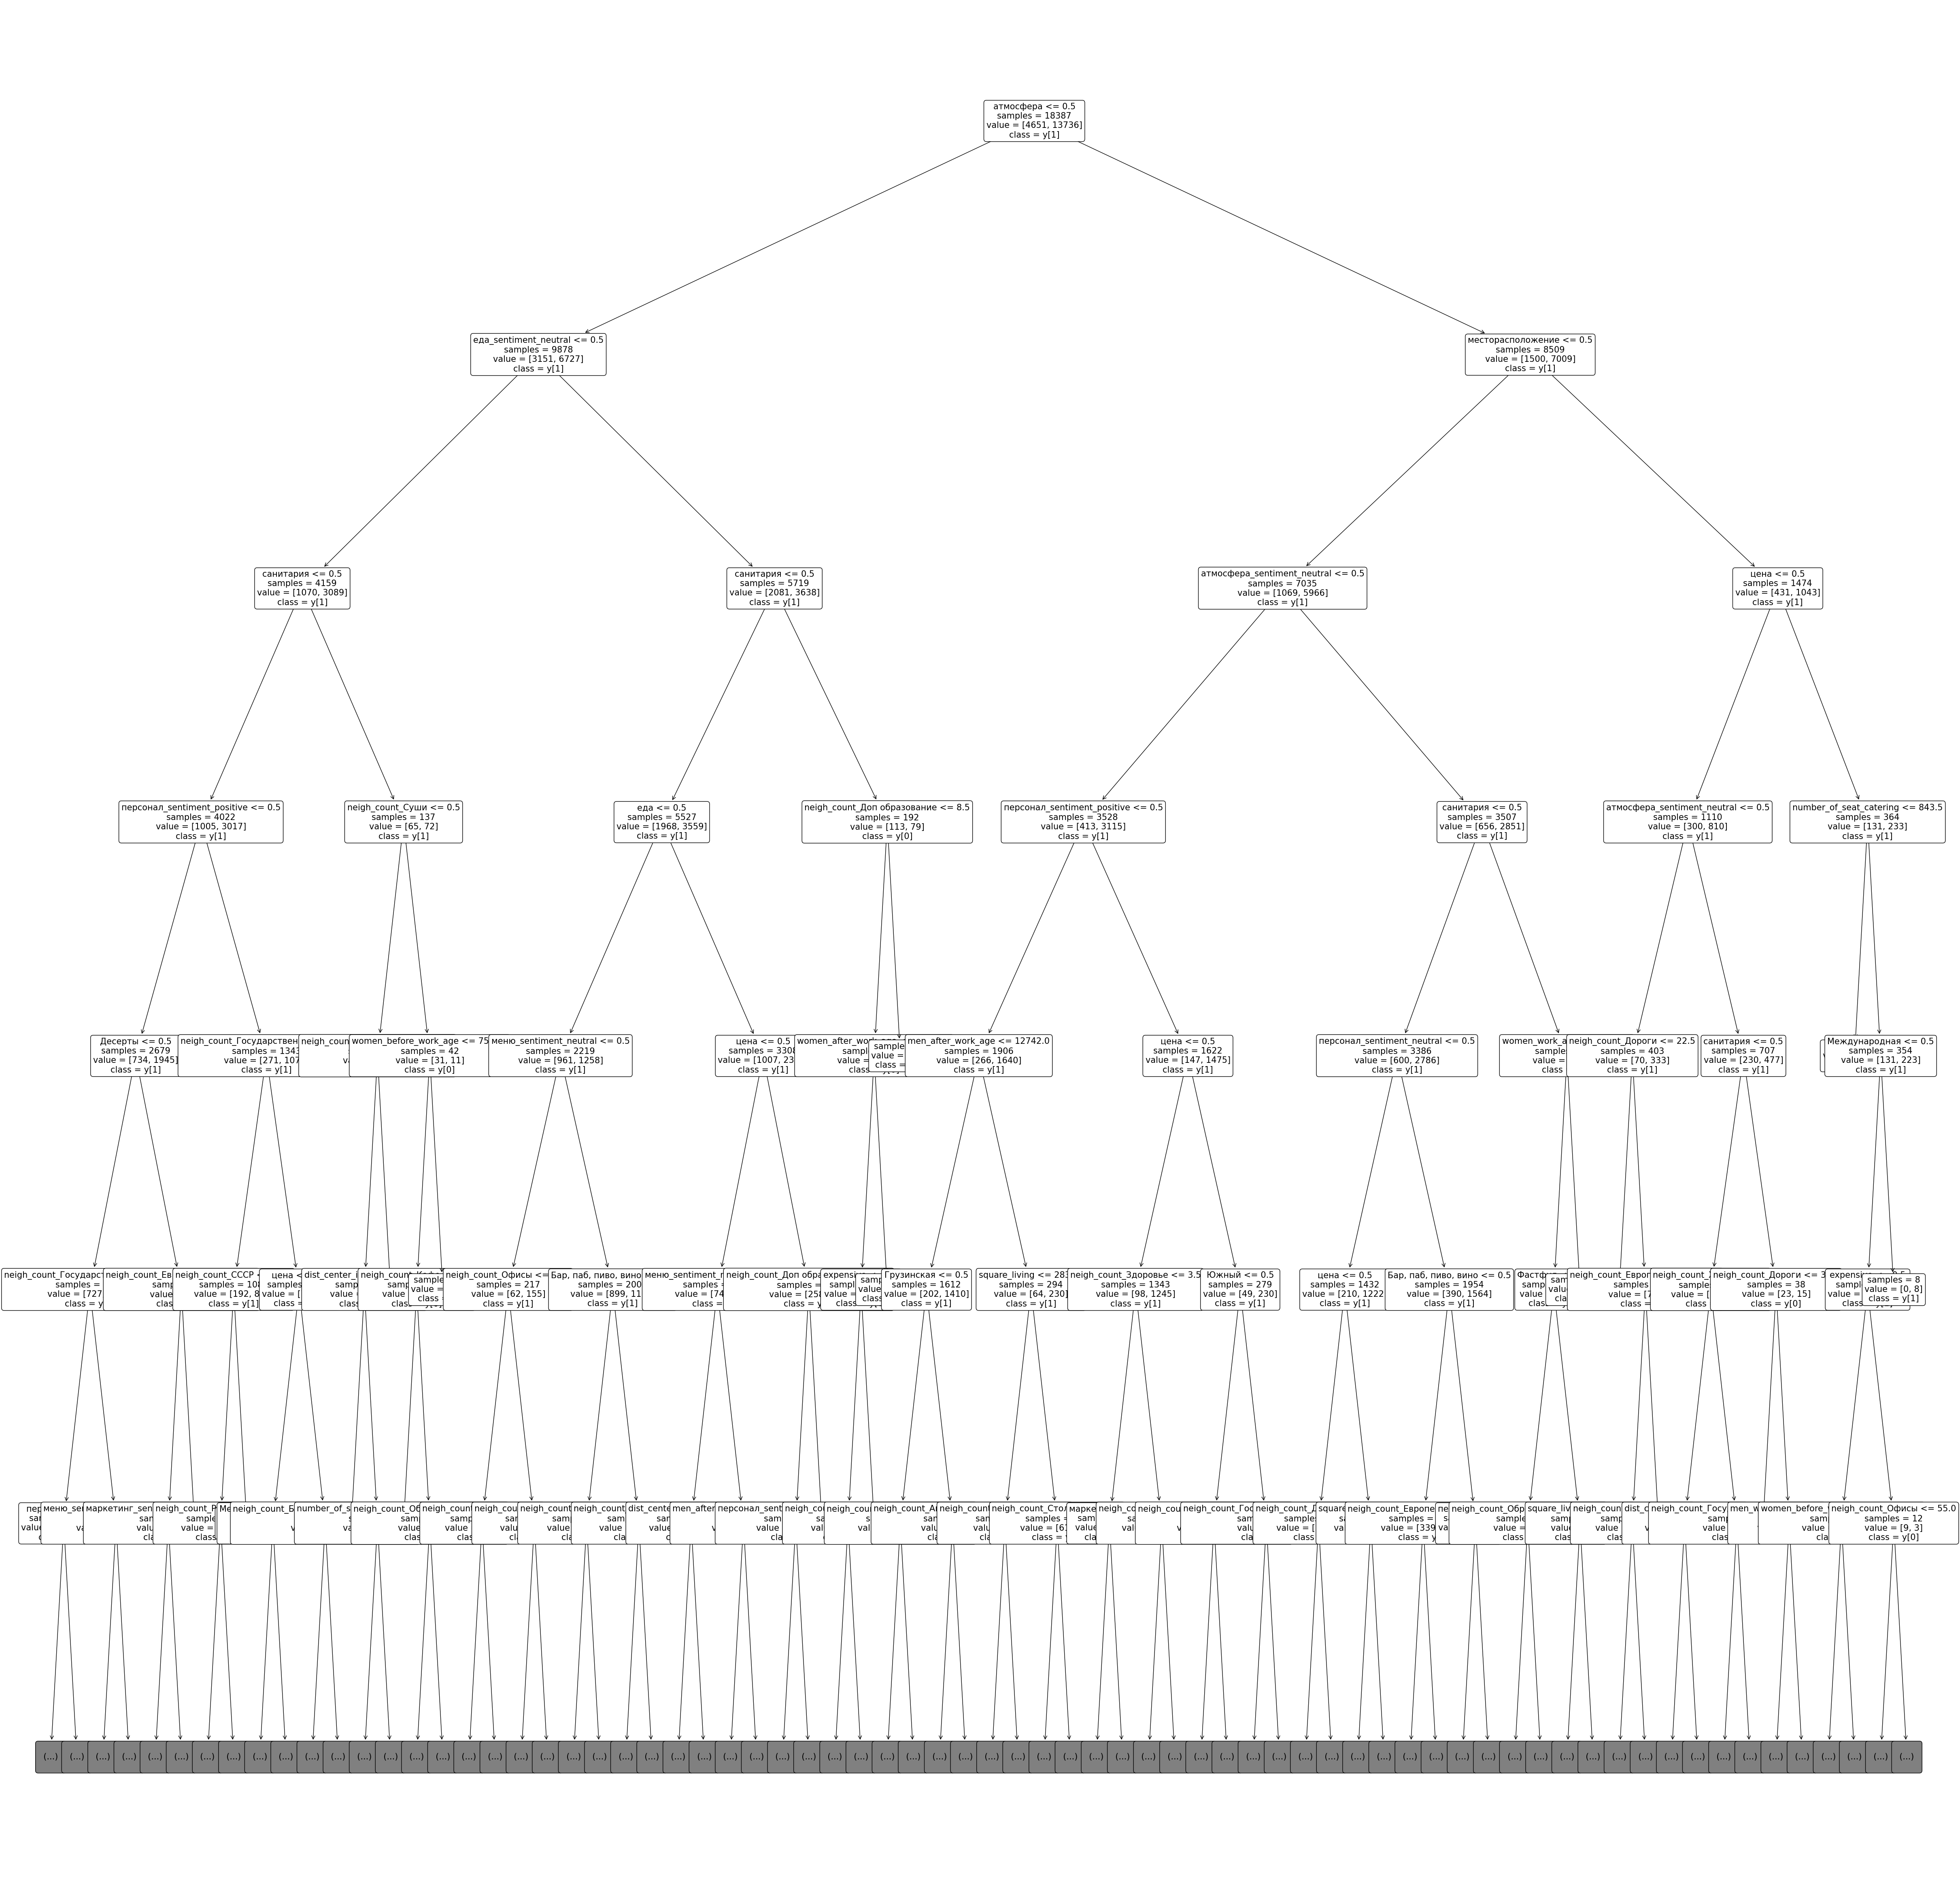

In [ ]:
plt.figure(figsize=(60, 60))  # установим размер графика (в дюймах)

# Получим имена колонок
column_names = X_train.columns.tolist()

# Отобразим только названия колонок, без остальной информации о дереве
from sklearn import tree
tree.plot_tree(class_model, feature_names=column_names, rounded=True, fontsize=15, class_names=True,
               impurity=False, proportion=False, node_ids=False, precision=2, ax=None, max_depth = 6) #rotate='deprecated',
               #vertical=False)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса
forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, max_features=140)

# Обучаем модель на обучающих данных
forest_model.fit(X_train, y_train['class'])

# Применяем модель к набору данных
for name, X_, y_ in X_y_datasets:
    prob = forest_model.predict_proba(X_)
    y_['__class_predict_randomforest'] = prob[:,1]

In [ ]:
for name, X_, y_ in X_y_datasets:
    prob = forest_model.predict_proba(X_)
    max_prob_class = prob.argmax(axis=1)
    y_['__class_predict_randomforest'] = max_prob_class

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Оценка матрицы ошибок
conf_matrix = confusion_matrix(y_train['class'], y_train['__class_predict_randomforest'])

# Оценка других метрик
class_report = classification_report(y_train['class'], y_train['__class_predict_randomforest'])

print("Матрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(class_report)

Матрица ошибок:
[[ 1161  3497]
 [   66 13663]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39      4658
           1       0.80      1.00      0.88     13729

    accuracy                           0.81     18387
   macro avg       0.87      0.62      0.64     18387
weighted avg       0.83      0.81      0.76     18387



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Оценка матрицы ошибок
conf_matrix = confusion_matrix(y_test['class'], y_test['__class_predict_randomforest'])

# Оценка других метрик
class_report = classification_report(y_test['class'], y_test['__class_predict_randomforest'])

print("Confusion matrix:")
print(conf_matrix)
print("\nReport about classification:")
print(class_report)

Confusion matrix:
[[ 132 1041]
 [  99 3325]]

Report about classification:
              precision    recall  f1-score   support

           0       0.57      0.11      0.19      1173
           1       0.76      0.97      0.85      3424

    accuracy                           0.75      4597
   macro avg       0.67      0.54      0.52      4597
weighted avg       0.71      0.75      0.68      4597



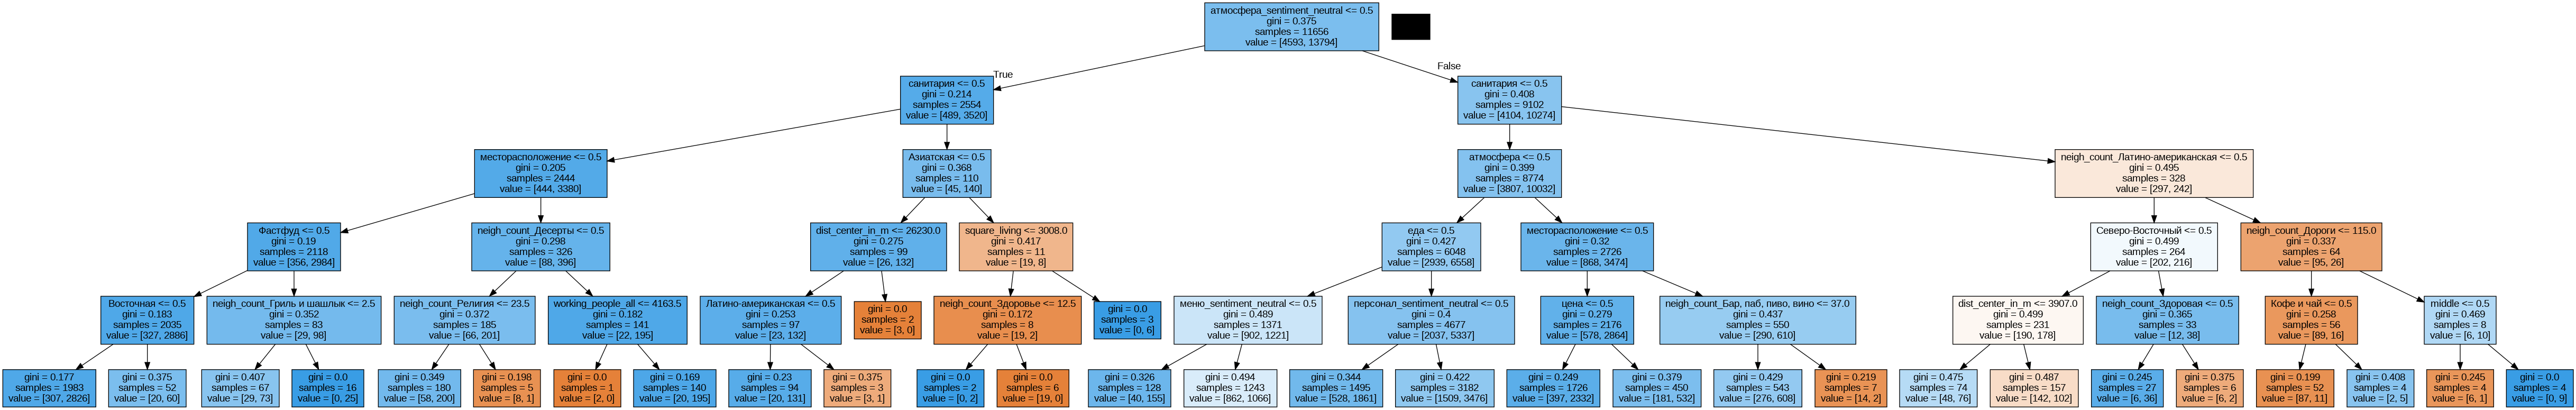

In [ ]:
# Создаем новую модель случайного леса с обрезанными деревьями
pruned_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, max_features=140)

# Обучаем модель на обучающих данных
pruned_forest_model.fit(X_train, y_train['class'])

# Выбираем одно из деревьев из обрезанного леса (например, первое)
one_pruned_tree = pruned_forest_model.estimators_[0]

# Экспортируем структуру дерева в формате DOT
dot_data_pruned = export_graphviz(one_pruned_tree, out_file=None, feature_names=train_columns, filled=True)

# Создаем граф для обрезанного дерева
pruned_graph = pydotplus.graph_from_dot_data(dot_data_pruned)

# Отображаем граф обрезанного дерева
Image(pruned_graph.create_png())